# Aula 03 - Exercício 02
## Aproximação de funções (Regressão)

Dataset `experimetal_dataset.txt` has 14 independent variables, organized in 14 columns. Column 15 has the dependent variable. Data values are separated by char `\t`.


Note that this dataset cannot be read line by line. Some lines were broken before the 15 columns.

In [4]:
import pandas as pd
import numpy as np

arq = open("../data/raw/experimental_dataset.txt", "r")

input_line = arq.read().split("\n")

del input_line[1]
del input_line[1]
del input_line[-1]
del input_line[-1]

processed_line = []
input_columns = list(filter(lambda x : x != '', input_line[0].replace('%', '').split("\t")))
del input_line[0]

for j, i in enumerate(input_line):
  value = list(filter(lambda x : x != '', i.split("\t")))
  if len(value) == 15:
    processed_line.append(list(map(lambda m: float(m), value)))
  else :
    processed_line.append(list(map(lambda m: float(m), value + list(filter(lambda x : x != '', input_line[j+1].split("\t"))))))
    del input_line[j+1]
df = pd.DataFrame(np.array(processed_line), columns=input_columns)

print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         VL     VM     VP      M   VMVL   VMVM   VMVP    VMM     T     H  \
0    1849.0  209.0   62.0  245.0  11.75  13.43   7.83  15.67  32.5  48.0   
1     580.0   48.0   88.0  137.0   8.60   8.60   7.20  10.70  29.9  42.0   
2    1438.0  207.0  108.0  386.0  11.80   9.40   8.60  13.40  37.1  28.0   
3     651.0   58.0   23.0   46.0   9.60  13.70  13.70  12.00  15.7  64.0   
4     623.0   55.0   82.0  141.0   5.10   4.50   6.60   7.80  27.4  46.0   
5     408.0   39.0    3.0   98.0   7.20   7.20   5.80  10.30  31.0  49.0   
6     908.0   99.0   29.0  347.0   7.20   9.40   7.20  10.40  32.8  42.0   
7     908.0   30.0  112.0   73.0   9.60   9.60   8.60  10.70  32.4  35.0   
8    1369.0  159.0  125.0  380.0  11.80   9.40   8.60  13.40  35.1  29.0   
9     306.0   48.0  104.0   96.0   7.90   9.40   6.30   9.40  16.6  61.0   
10    500.0   86.0    3.0  179.0   

O tratamento da entrada foi feita com lógicas e comandos simples de python, iterando através das linhas lidas do arquivo. Concatenamos as linhas quebradas comparando a quantidade de elementos presente na lista que era construída usando a linha. Dessa forma, se existissem menos de 15 elementos na lista, 
ocorria a concatenação com a string subsequente.

A lista com todas as linhas tratadas foi então adicionada junto às colunas ao dataframe, para posterior utilização nos próximos exercícios. Também deletamos linhas vazias antes de iniciar o tratamento, para considerar somente as entradas válidas.


            VL        VM        VP         M      VMVL      VMVM      VMVP  \
VL    1.000000  0.892725  0.125460  0.635456  0.526624  0.513067  0.146868   
VM    0.892725  1.000000  0.173197  0.755762  0.570628  0.461671  0.187972   
VP    0.125460  0.173197  1.000000  0.290346  0.145463  0.237025 -0.072337   
M     0.635456  0.755762  0.290346  1.000000  0.340981  0.163238  0.086327   
VMVL  0.526624  0.570628  0.145463  0.340981  1.000000  0.646706  0.573290   
VMVM  0.513067  0.461671  0.237025  0.163238  0.646706  1.000000  0.417954   
VMVP  0.146868  0.187972 -0.072337  0.086327  0.573290  0.417954  1.000000   
VMM   0.214022  0.244904  0.065337  0.050439  0.475098  0.480419  0.271917   
T     0.100064  0.127280 -0.127909  0.148949 -0.030667 -0.080685 -0.163228   
H    -0.272900 -0.247497 -0.016518 -0.236621  0.024296 -0.008356  0.236470   
Vv    0.088457  0.091559  0.071989  0.088813  0.167326  0.086886 -0.015558   
DirV  0.053796  0.051279 -0.108532  0.030351  0.178110  0.122674

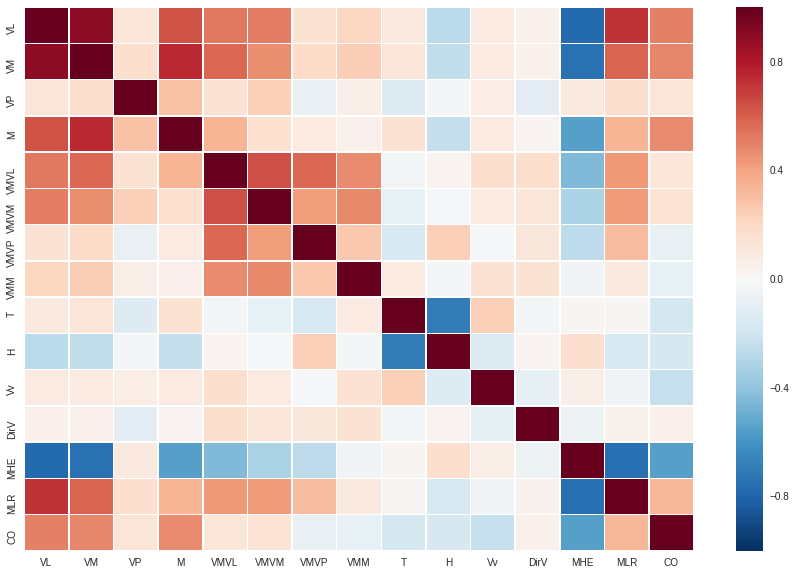

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_mat = df.corr()

print(corr_mat)

plt.rcParams['figure.figsize'] = [15, 10]
ax = sns.heatmap(corr_mat, linewidth=0.5)
plt.show()

A matriz de correlação foi gerada a partir do dataframe obtido no exercício anterior, com o próprio método "corr()" da classe. A partir da matriz, o mapa de calor foi gerado para que fosse possível realizar uma análise mais concreta dos dados. O tamanho do mapa de calor foi redimensionado usando a função apontada na Dica 2 do exercício para obter uma melhor visualização.

Após analisar a matriz de correlação e o mapa de calor, consideramos que a variável mais relevante para prever a variável CO, rótulo de cada linha, poderia ser qualquer uma entre, VL, VM e M, pois todas elas apresentavam correlação próxima a 0.5 com a variável CO, como pode-se ver no mapa e na matriz de correlação em si. Dentre essas opções, escolhemos arbitrariamente a variável VL.


Erro quadrático médio: 6.44


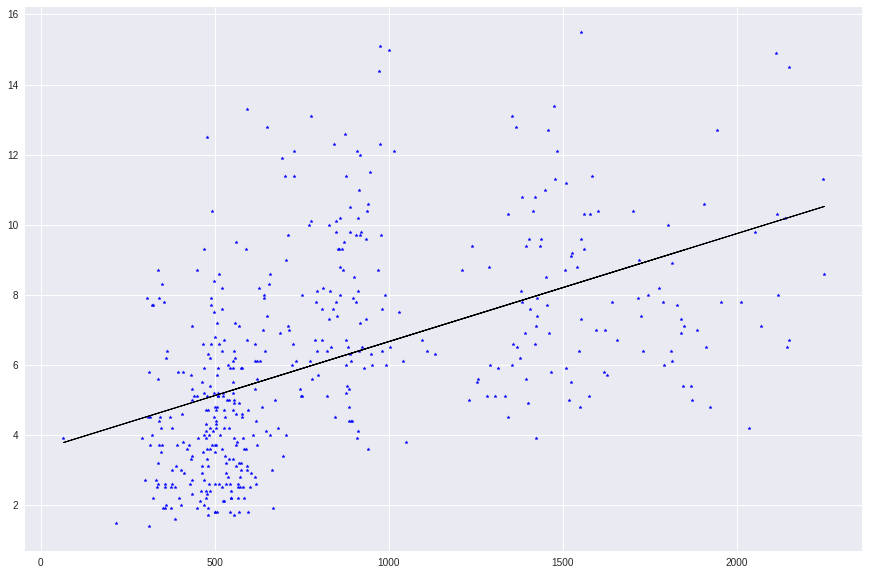

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_lab, y_lab = input_columns[0], input_columns[14]
new_df = pd.DataFrame(np.c_[df[x_lab], df[y_lab]], columns = [x_lab, y_lab])
ts = new_df.dropna()

x = new_df[[x_lab]].as_matrix()
y = new_df[[y_lab]].as_matrix()

lm = LinearRegression()
regressor = lm.fit(x, y)
y_pred = regressor.predict(x) 

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
plt.scatter(x,y,s=11,c='blue',marker='*')
plt.plot(x, y_pred, linewidth=1, color='black')


Levando em conta a variável VL para a predição de CO, um novo conjunto de variáveis foi criado conforme recomendado, usando os dados de VL para "x" na regressão e CO para "y". Como os dados já estavam disponíveis nas colunas 0 e 14 do dataframe usado na atividade, foi feita uma concatenação com a função "c_" do numpy para o novo dataframe "new_df". Além disso, também tratamos de remover os possíveis valores "not a number" do dataframe para que eles não prejudicassem a predição.

Usando a API LinearRegression, a predição de CO foi feita utilizando a variável VL com os métodos "fit(x, y)" e "predict(x)" do próprio pacote, como pode ser visto acima. O erro quadrático médio (6.44) foi calculado usando o numpy e foi desenhado o gráfico da reta obtida pela regressão e de cada um dos pontos das observações de CO em função de VL. 



Erro quadrático médio: 5.90


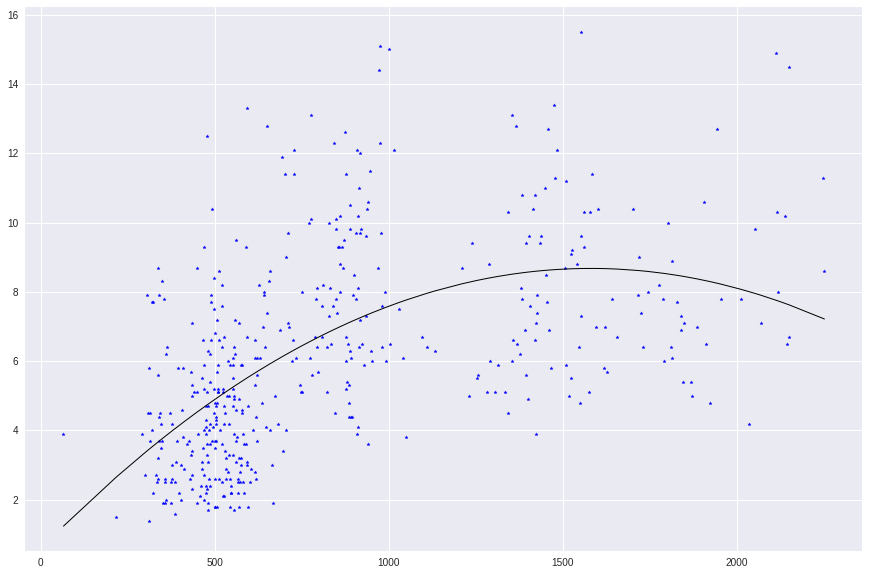

In [12]:
import operator
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("Mean squared error: %.2f" % mean_squared_error(y, y_poly_pred))

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_s, y_poly_pred = zip(*sorted_zip)

plt.scatter(x,y,s=11,c='blue',marker='*')
plt.plot(x_s, y_poly_pred, linewidth=1, color='black')

Após realizar a transformação dos dados para realizar a regressão polinomial por função quadrática, realizamos novamente o treinamento do modelo e a predição de CO com base na variável VL, chegando ao erro quadrático médio 5.90, um erro menor do que o erro obtido no exercício anterior na qual uma regressão via função linear foi utilizada. O gráfico para a curva obtida também foi desenhado de maneira análoga ao exercício anterior, com a adição das adaptações necessárias para o desenho da curva.


Erro quadrático médio: 5.82


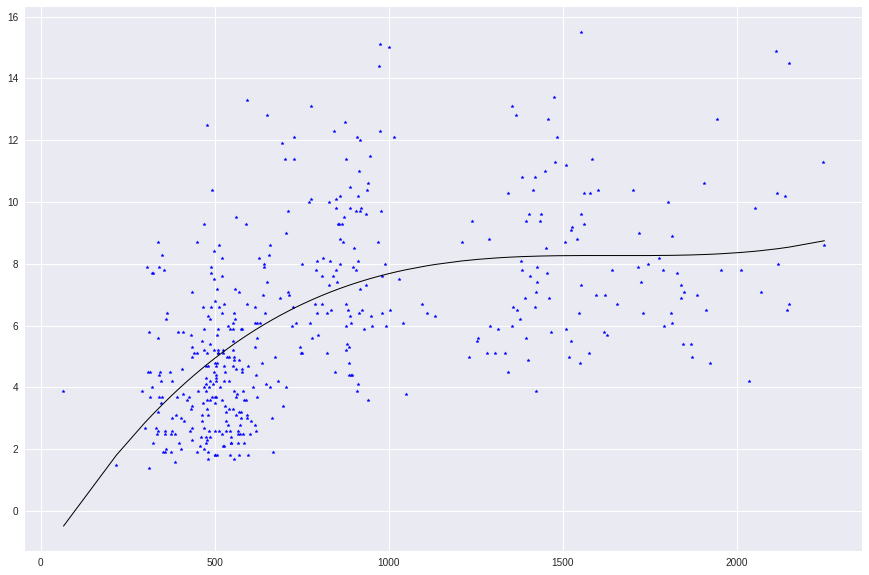

In [13]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("Mean squared error: %.2f" % mean_squared_error(y, y_poly_pred))

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_s, y_poly_pred = zip(*sorted_zip)

plt.scatter(x,y,s=11,c='blue',marker='*')
plt.plot(x_s, y_poly_pred, linewidth=1, color='black')

Neste último exercício, foi aplicada uma solução semelhante à do exercício anterior, apenas trocando o grau da função Polynomial Features para obter-se uma aproximação via função cúbica. Foi realizado um novo treinamento do modelo e uma nova predição de CO com ele. Dessa vez, o erro quadrático médio obtido foi de 5.82, menor do que o erro obtido para a regressão por função linear e menor do que o erro calculado para o uso da regressão com função quadrática. No entanto, pode-se notar que a diferença entre os erros da regressão cúbica e da regressão quadrática é menor do que a diferença dos erros entre a regressão quadrática e a regressão cúbica, o que pode indicar uma estabilização na qualidade da previsão e um possível overfitting caso o grau do polinômio seja aumentado mais vezes. Novamente o gráfico foi criado a partir da biblioteca "pyplot" com a curva obtida pela regressão e os pontos das observações de CO em relação a VL no eixo X.